In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
import sys
import numpy as np
import re
matches_dict = {}
km_list = ['KCAT', 'KM', 'KKM']
# map
protein_feature = ['ProtT5', 'ESM-1b','ESM-1v' 'ESM2', 'ESMC', 'ProLLaMA']
substrate_feature = ['SMILES Transformer', 'Mole-BERT', 'MolGen', 'UniMol V1', 'UniMol V2', 'ChemBERTa-2', 'MACCSkeys', 'RDKitFP', 'ECFP']

matrix = np.zeros((len(protein_feature), len(substrate_feature)))
protein_mapping = {
    'esm1b': 'ESM-1b',
    'esm1v': 'ESM-1v',
    'esm2': 'ESM2',
    'esmc': 'ESMC',
    'prott5': 'ProtT5',
    'prollama': 'ProLLaMA',
}

substrate_mapping = {
    'rdkitfp': 'RDKitFP',
    'molebert': 'Mole-BERT',
    'unimolv1': 'UniMol V1',
    'unimolv2': 'UniMol V2',
    'ecfp': 'ECFP',
    'molgen': 'MolGen',
    'maccskeys': 'MACCSkeys',
    'smitrans': 'SMILES Transformer',
    'chemberta2': 'ChemBERTa-2',
}

In [2]:
# plot
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(matrix, protein_feature, substrate_feature, vmax, vmin, figname):
    plt.figure(figsize=(1.8, 2), dpi=600)  # Set the figure size
    plt.rcParams.update({
        'font.size': 7,
        'font.family': 'Arial',
        'mathtext.fontset': 'custom',  # Important: Allow custom math fonts
        'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
        'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
        'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
        'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
        'ps.fonttype': 42
    })

    # Set axis styles
    plt.gca().spines['top'].set_linewidth(0)
    plt.gca().spines['bottom'].set_linewidth(0)
    plt.gca().spines['left'].set_linewidth(0)
    plt.gca().spines['right'].set_linewidth(0)

    # Use matplotlib to draw the heatmap
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest', vmax=vmax, vmin=vmin)  # Generate heatmap

    # Set x-axis and y-axis labels
    plt.xticks(np.arange(len(substrate_feature)), substrate_feature, fontsize=6, rotation=50, ha='right')
    plt.yticks(np.arange(len(protein_feature)), protein_feature, fontsize=6)

    ticks = np.arange(vmin + 0.005, vmax + 0.005, 0.02)
    ticks = np.round(ticks, 2)  # Round to two decimal places

    # Display the corresponding value in each cell
    for i in range(len(protein_feature)):
        for j in range(len(substrate_feature)):
            if matrix[i, j] > ticks[1] - 0.005 and matrix[i, j] < ticks[-2] + 0.005:
                plt.text(j, i, f"{matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=5)
            else:
                plt.text(j, i, f"{matrix[i, j]:.2f}", ha='center', va='center', color='white', fontsize=5)

    # Set axis parameters
    plt.tick_params(axis='x', direction='out', width=0.5, which='both', length=1, pad=2)
    plt.tick_params(axis='y', direction='out', width=0.5, which='both', length=1, pad=2)

    # Set the range for the x and y axes
    plt.xlim(-0.5, len(substrate_feature) - 0.5)
    plt.ylim(len(protein_feature) - 0.5, -0.5)

    # # Place x-axis ticks on top
    # plt.gca().xaxis.set_ticks_position('top')

    # Add the colorbar after imshow
    cbar_ax = plt.axes([0.92, 0.24, 0.04, 0.51])  # [left, bottom, width, height]
    cbar = plt.colorbar(cax=cbar_ax)  # Colorbar automatically picks the range from imshow
    cbar.outline.set_linewidth(0)
    cbar.ax.tick_params(axis='both', direction='out', width=0.5, length=1, pad=1, labelsize=5)
    cbar.set_label('R²', fontsize=6, rotation=0, fontweight='bold')
    cbar.ax.get_yaxis().set_label_coords(0.65, 1.1)  # Adjust the position
    cbar.ax.get_yaxis().set_ticks(ticks)  # Set the ticks
    cbar.set_ticklabels(ticks)  # Set the tick labels for the colorbar

    # Show the plot
    plt.savefig(figname, dpi=600, bbox_inches='tight')

    plt.show()

## DLKcat

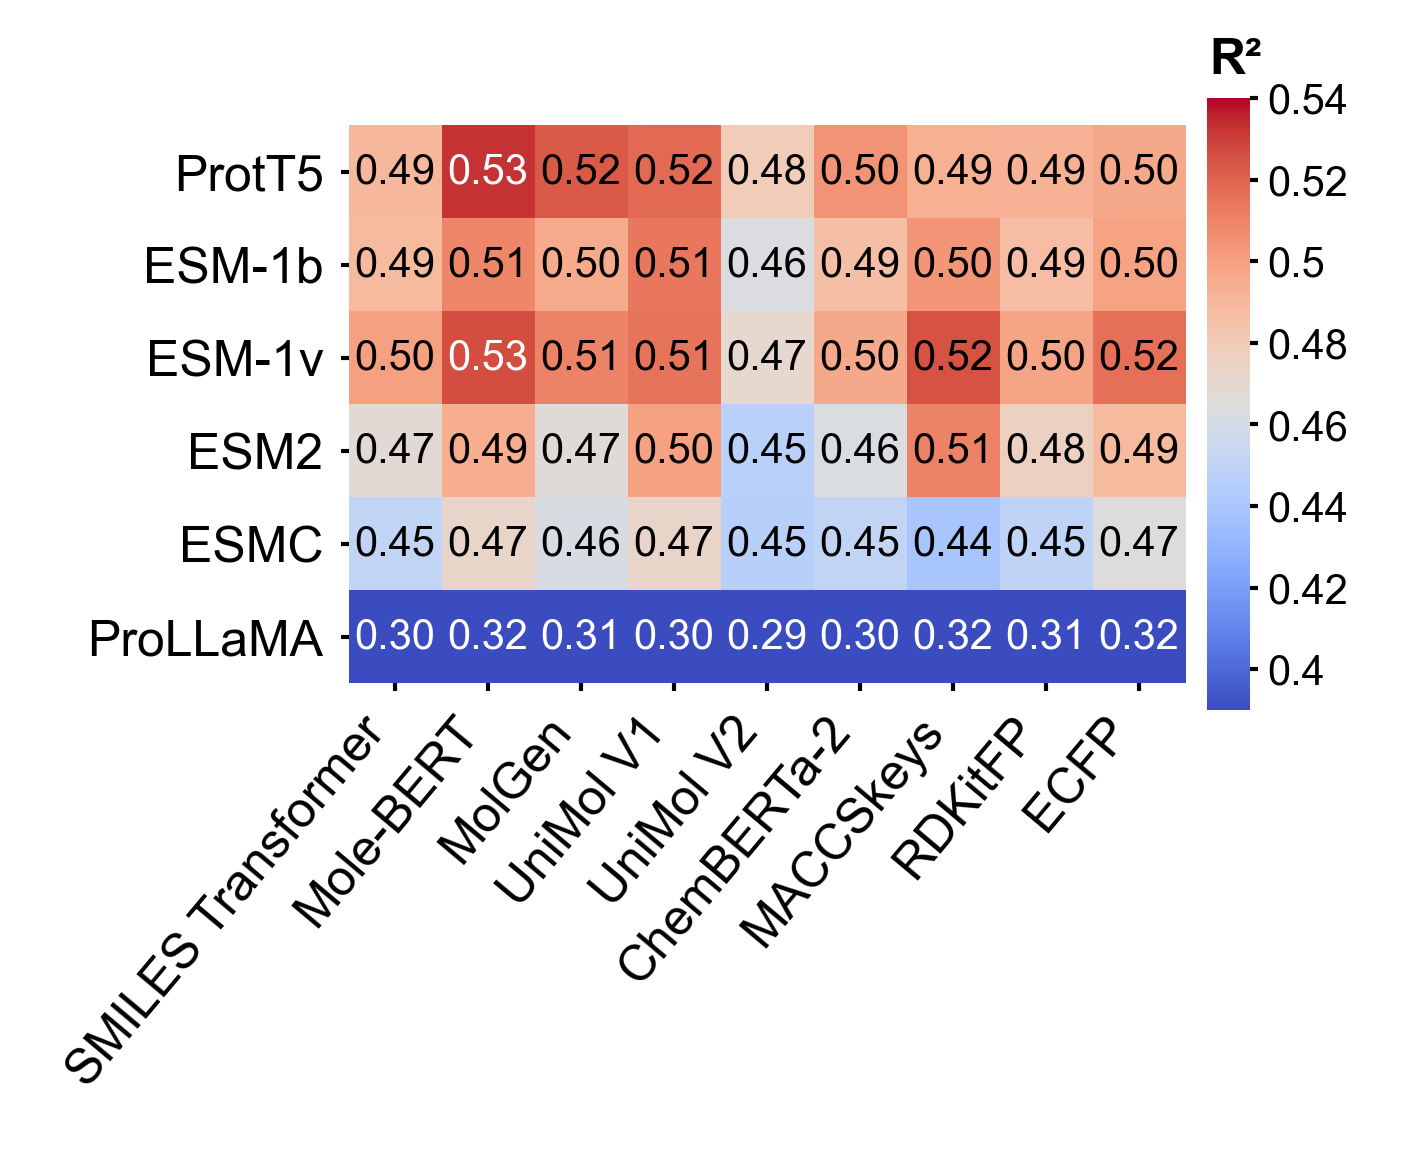

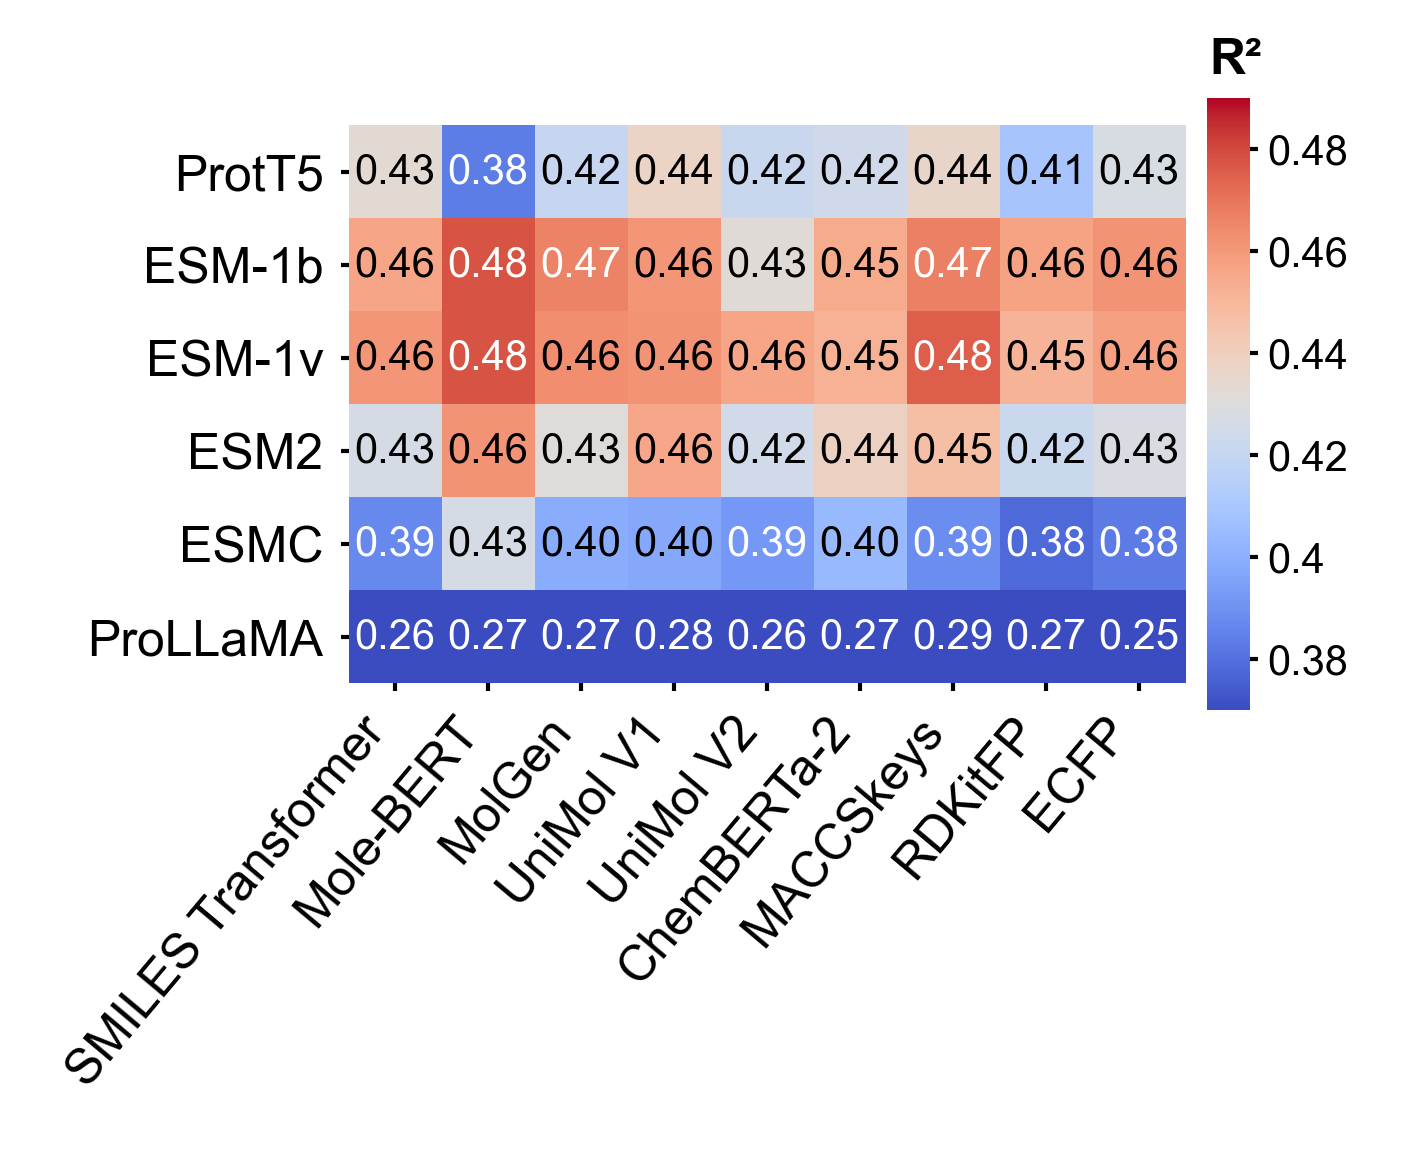

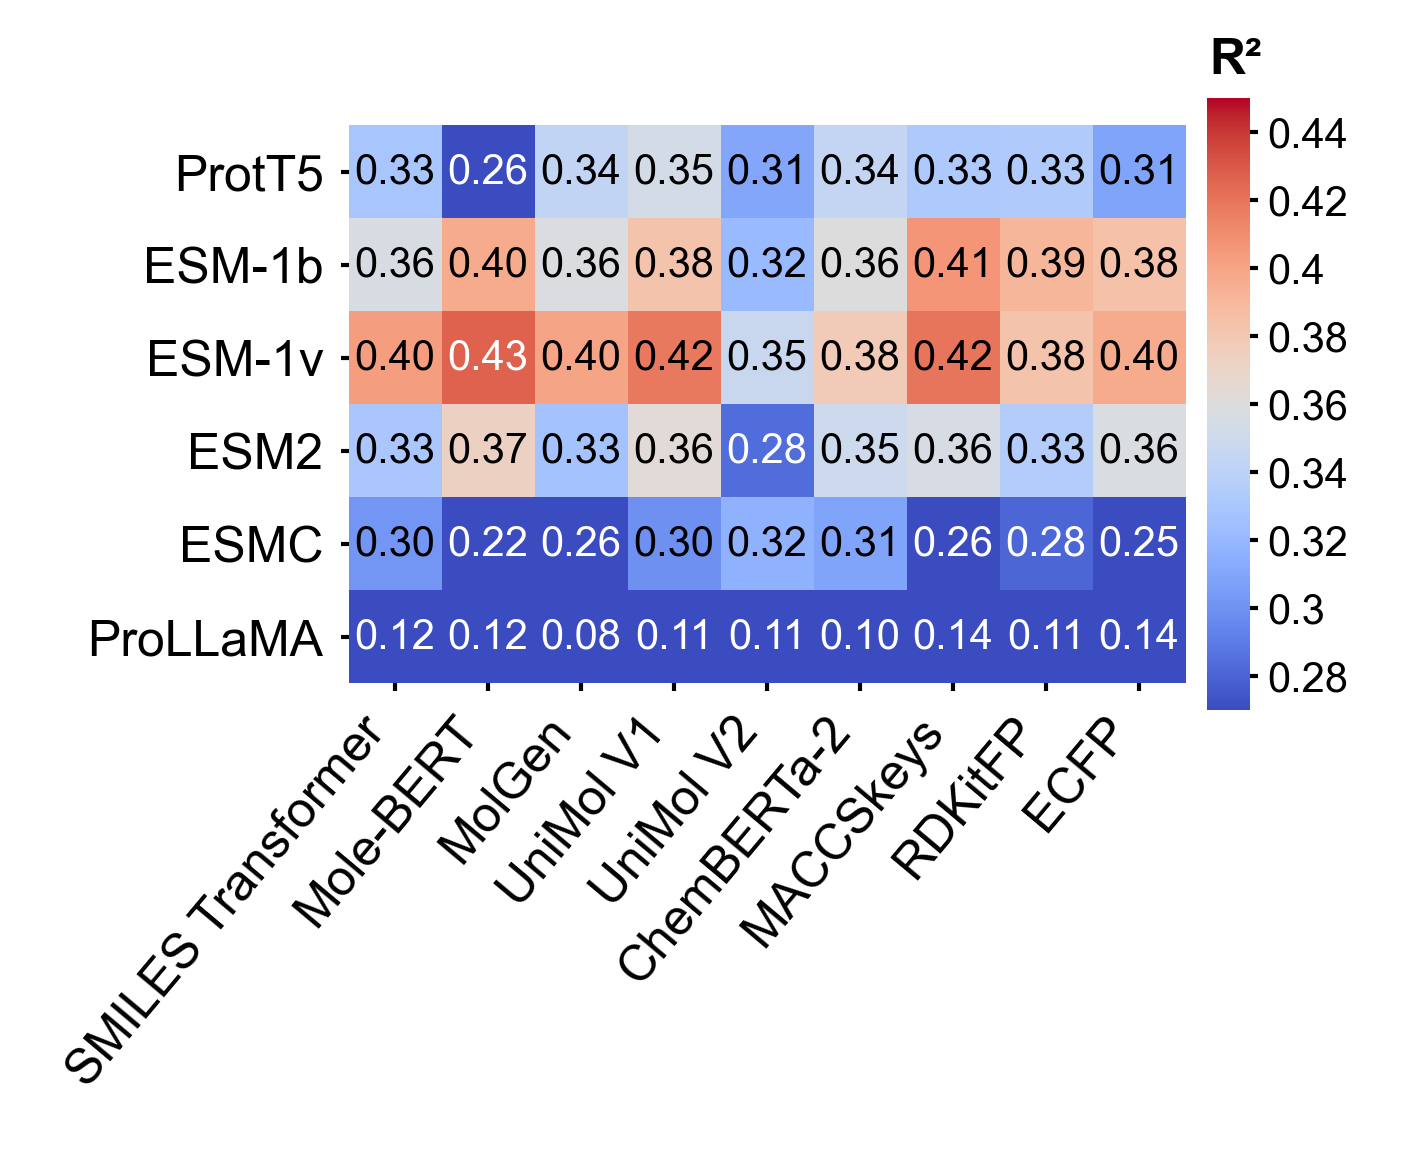

In [3]:
import json
import numpy as np

def new_plot(path):
    with open(path, 'r') as f:
        data = json.load(f)
    # Get all substrate feature names (x-axis)
    substrate_features = ['smitrans', 'molebert', 'molgen', 'unimolv1', 'unimolv2', 'chemberta2', 'maccskeys', 'rdkitfp', 'ecfp']

    # Get all protein feature names (y-axis)
    protein_features = ['prott5', 'esm1b', 'esm1v', 'esm2', 'esmc', 'prollama']

    # Initialize an empty matrix to store the average values
    matrix = []

    for substrate in substrate_features:
        row = []
        for protein in protein_features:
            values = data[substrate].get(protein, [])
            if len(values) >= 1:
                avg_value = round(np.mean(values), 4)
            else:
                avg_value = float('nan')  # Handle missing values
            row.append(avg_value)
        matrix.append(row)

    # Transpose the list: each row is a protein feature, each column is a substrate feature
    matrix = np.array(matrix).T  # shape: (len(protein_features), len(substrate_features))
    return matrix, protein_features, substrate_features

# Assuming `plot_heatmap`, `substrate_mapping`, and `protein_mapping` are defined elsewhere
# For this code to run, these would need to be defined, for example:
# from your_plotting_module import plot_heatmap 
# from your_mapping_module import substrate_mapping, protein_mapping

matrix, protein_features, substrate_features = new_plot('../Data/cv/KCAT_dlkcat.json')
# Ensure the order of features matches the mapping
substrate_features_mapped = [substrate_mapping[name] for name in substrate_features if name in substrate_mapping]
protein_features_mapped = [protein_mapping[name] for name in protein_features if name in protein_mapping]
# Update the call to the heatmap plotting function
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.54, vmin=0.39, figname='./pdf/fig3-dlkcat_kcat.pdf')

matrix, protein_features, substrate_features = new_plot('../Data/cv/KM_dlkcat.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.49, vmin=0.37, figname='./pdf/fig3-dlkcat_km.pdf')

matrix, protein_features, substrate_features = new_plot('../Data/cv/KKM_dlkcat.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.45, vmin=0.27, figname='./pdf/fig3-dlkcat_kkm.pdf')

## CataPro

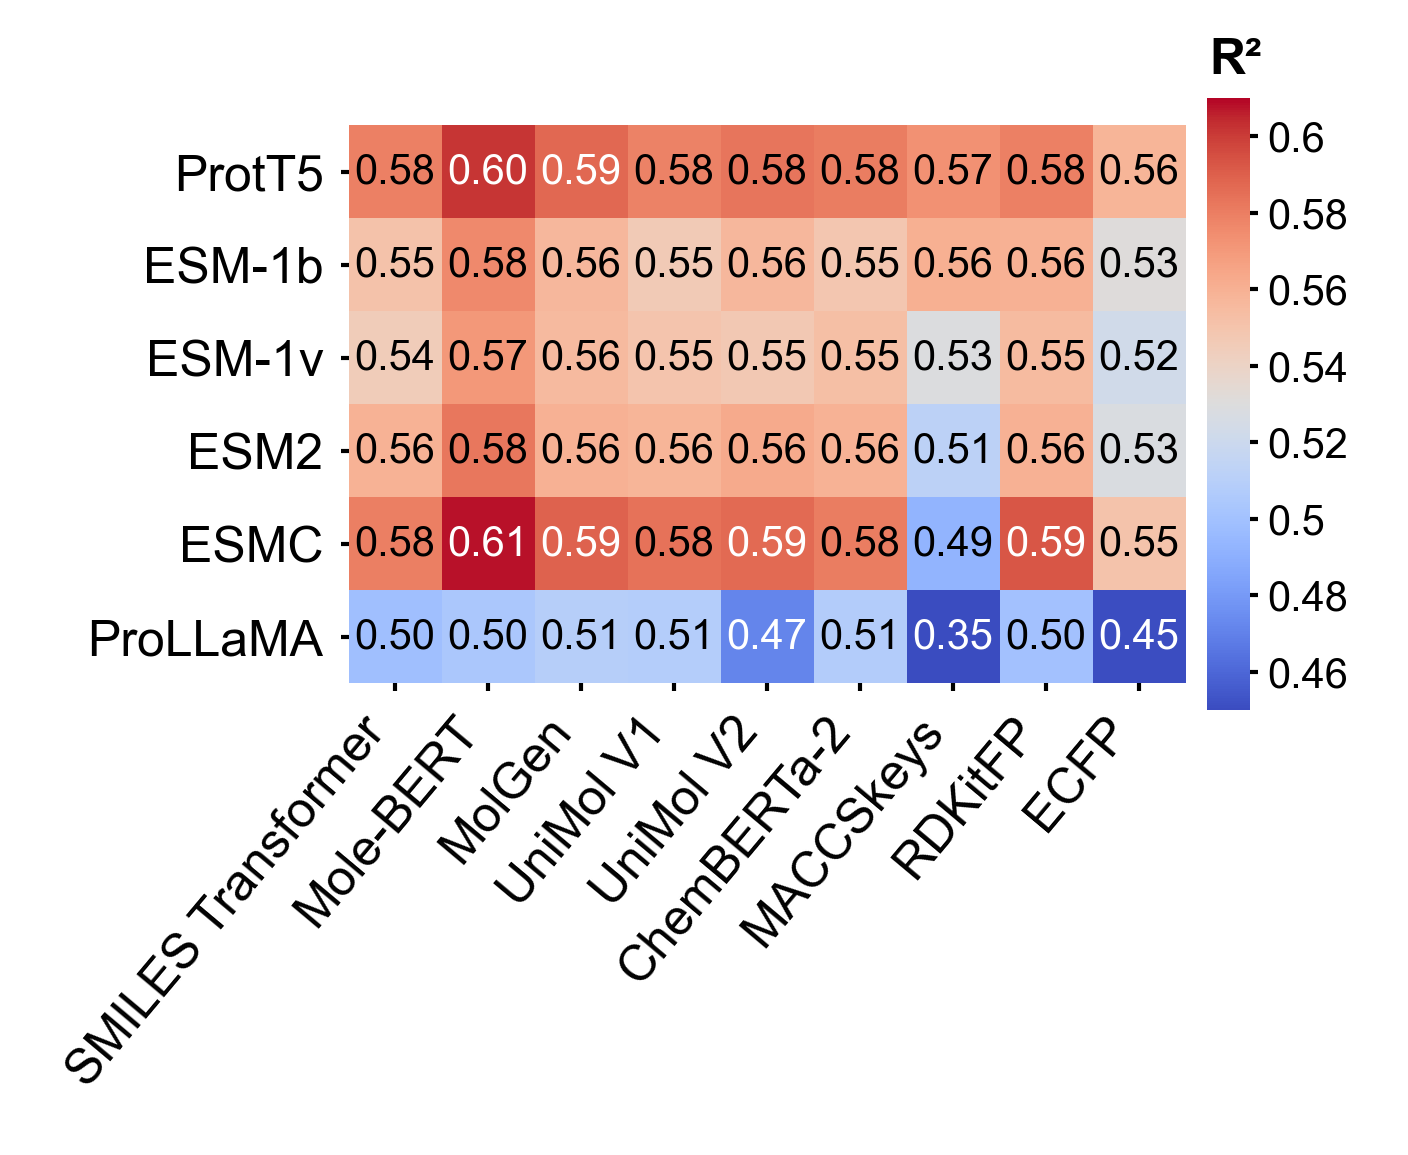

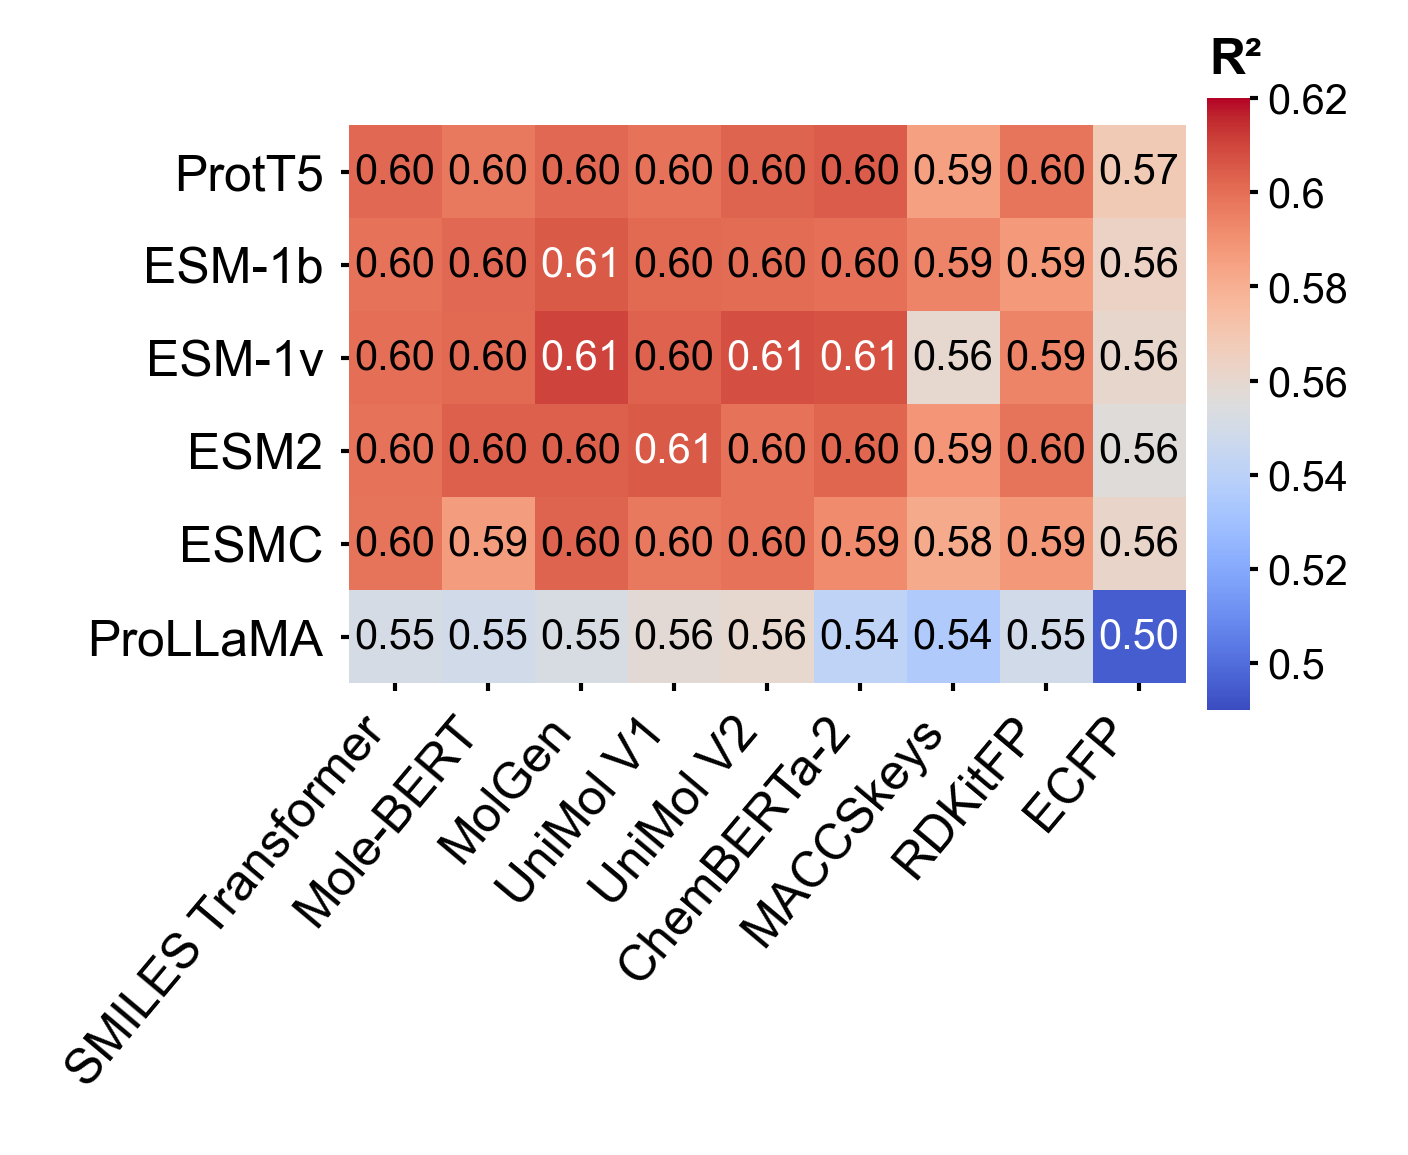

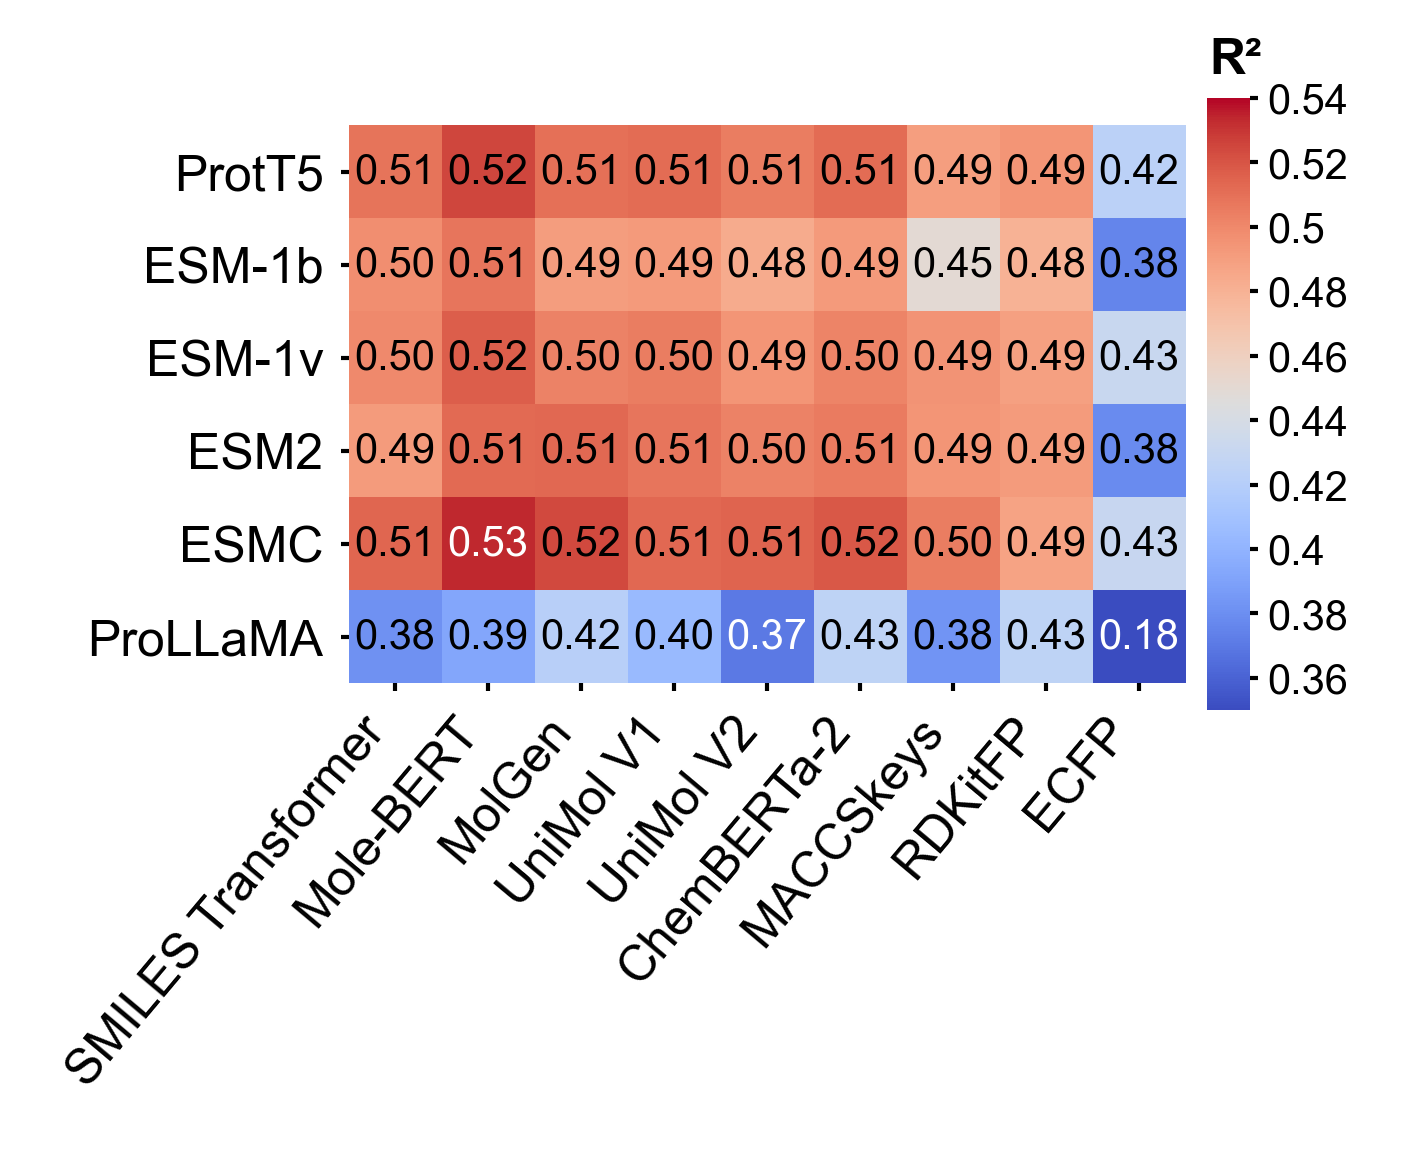

In [4]:
matrix, protein_features, substrate_features = new_plot('../Data/cv/KCAT_catapro.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.61, vmin=0.45, figname='./pdf/fig3-catapro_kcat.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KM_catapro.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.62, vmin=0.49, figname='./pdf/fig3-catapro_km.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KKM_catapro.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.54, vmin=0.35, figname='./pdf/fig3-catapro_kkm.pdf')

## UniKP

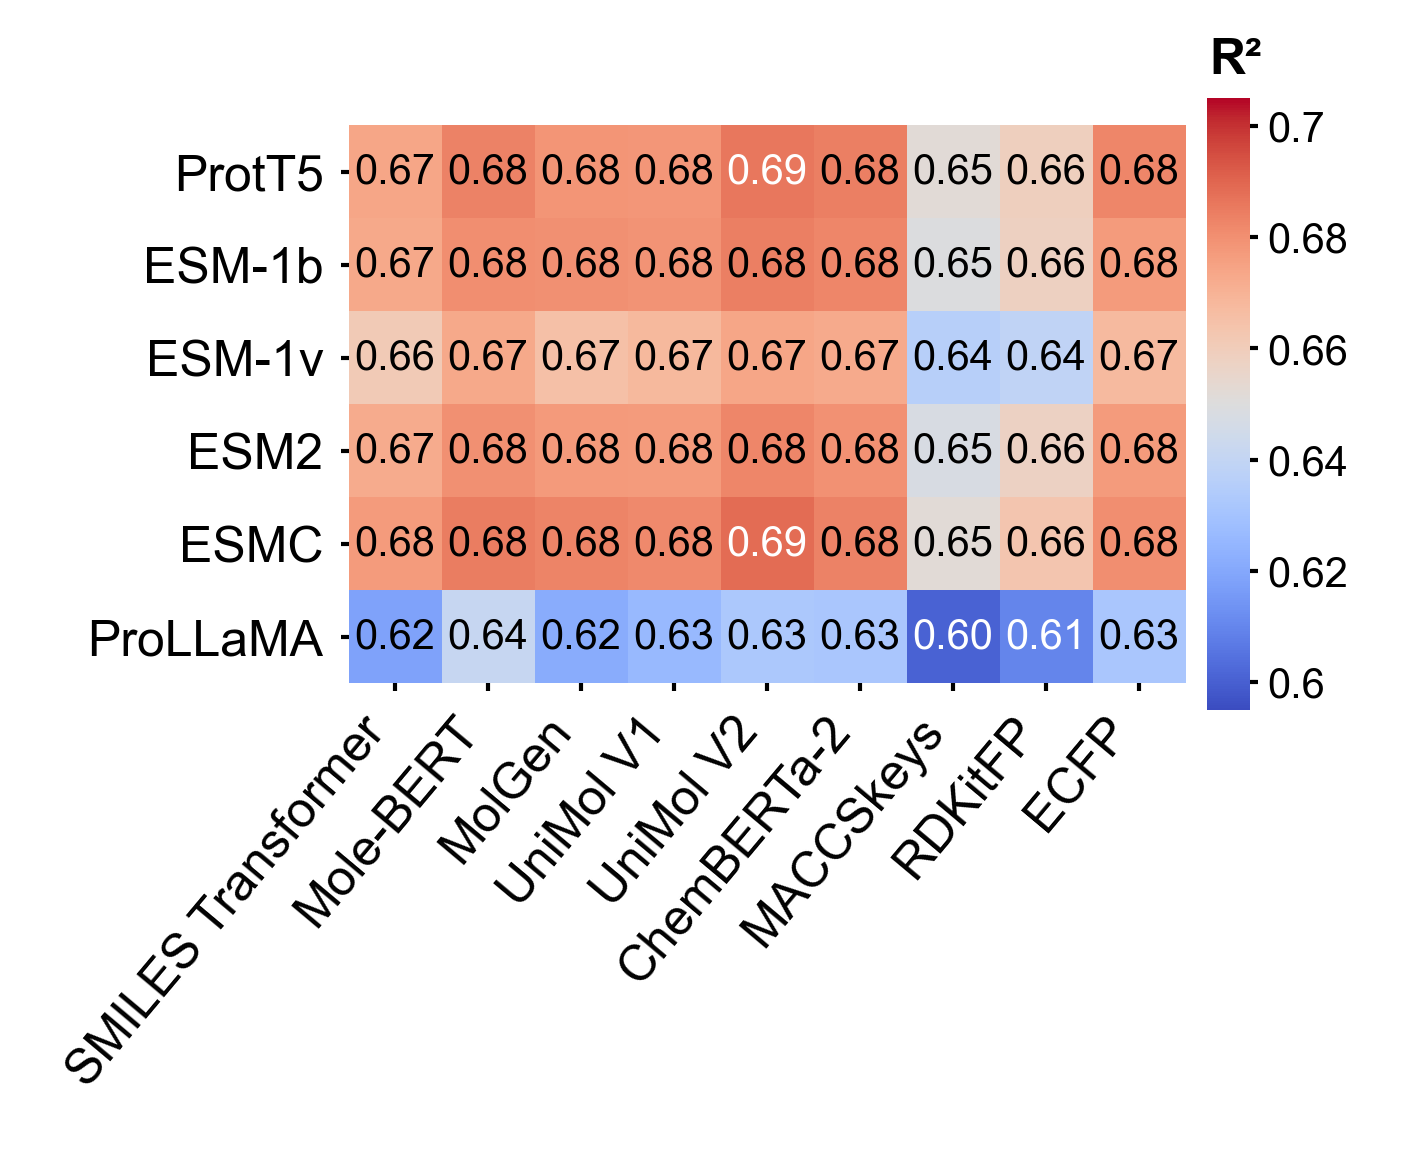

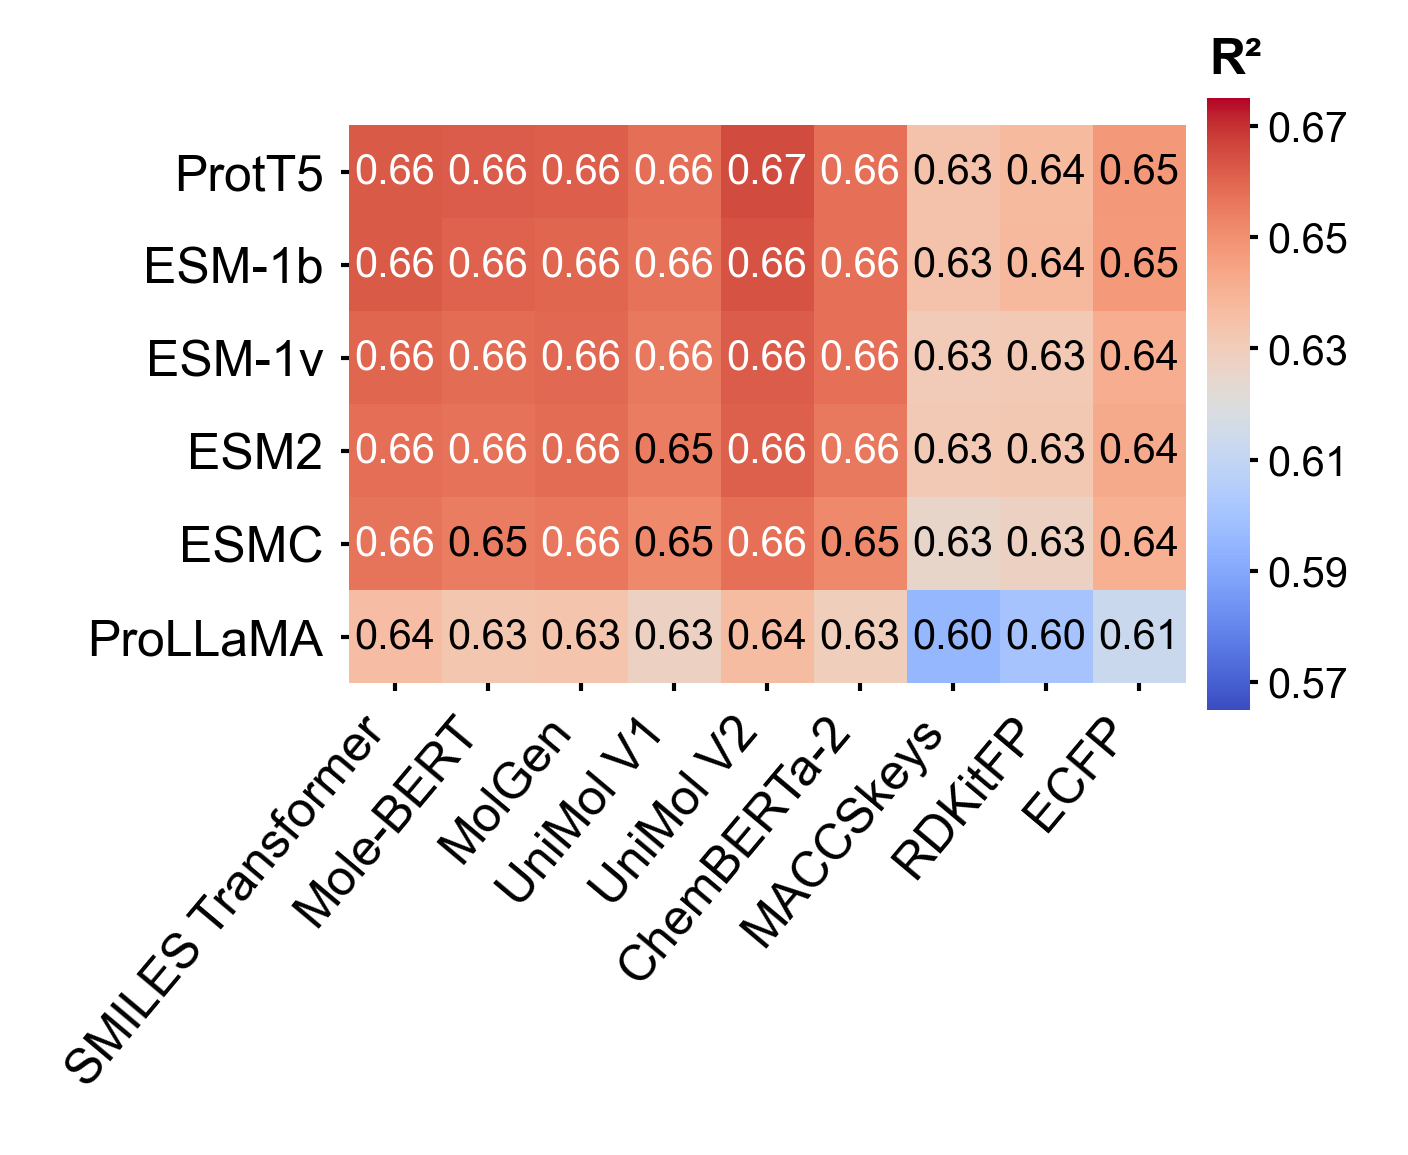

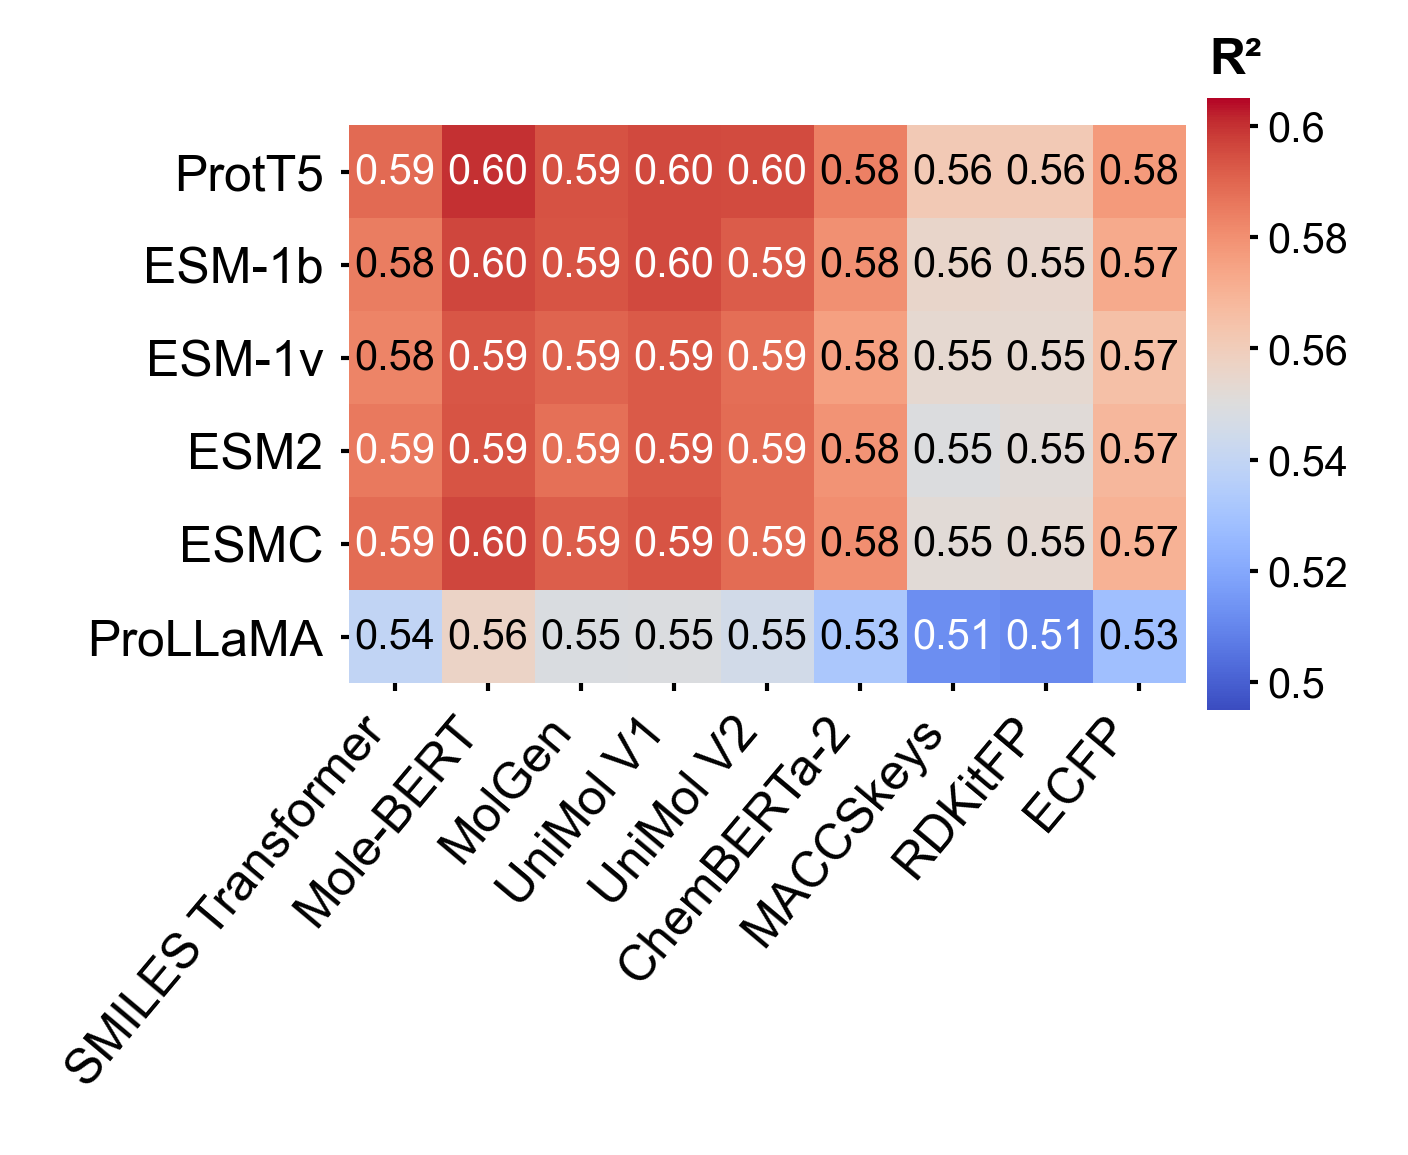

In [5]:
matrix, protein_features, substrate_features = new_plot('../Data/cv/KCAT_unikp.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.705, vmin=0.595, figname='./pdf/fig3-unikp_kcat.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KM_unikp.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.675, vmin=0.565, figname='./pdf/fig3-unikp_km.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KKM_unikp.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.605, vmin=0.495, figname='./pdf/fig3-unikp_kkm.pdf')

## EITLEM

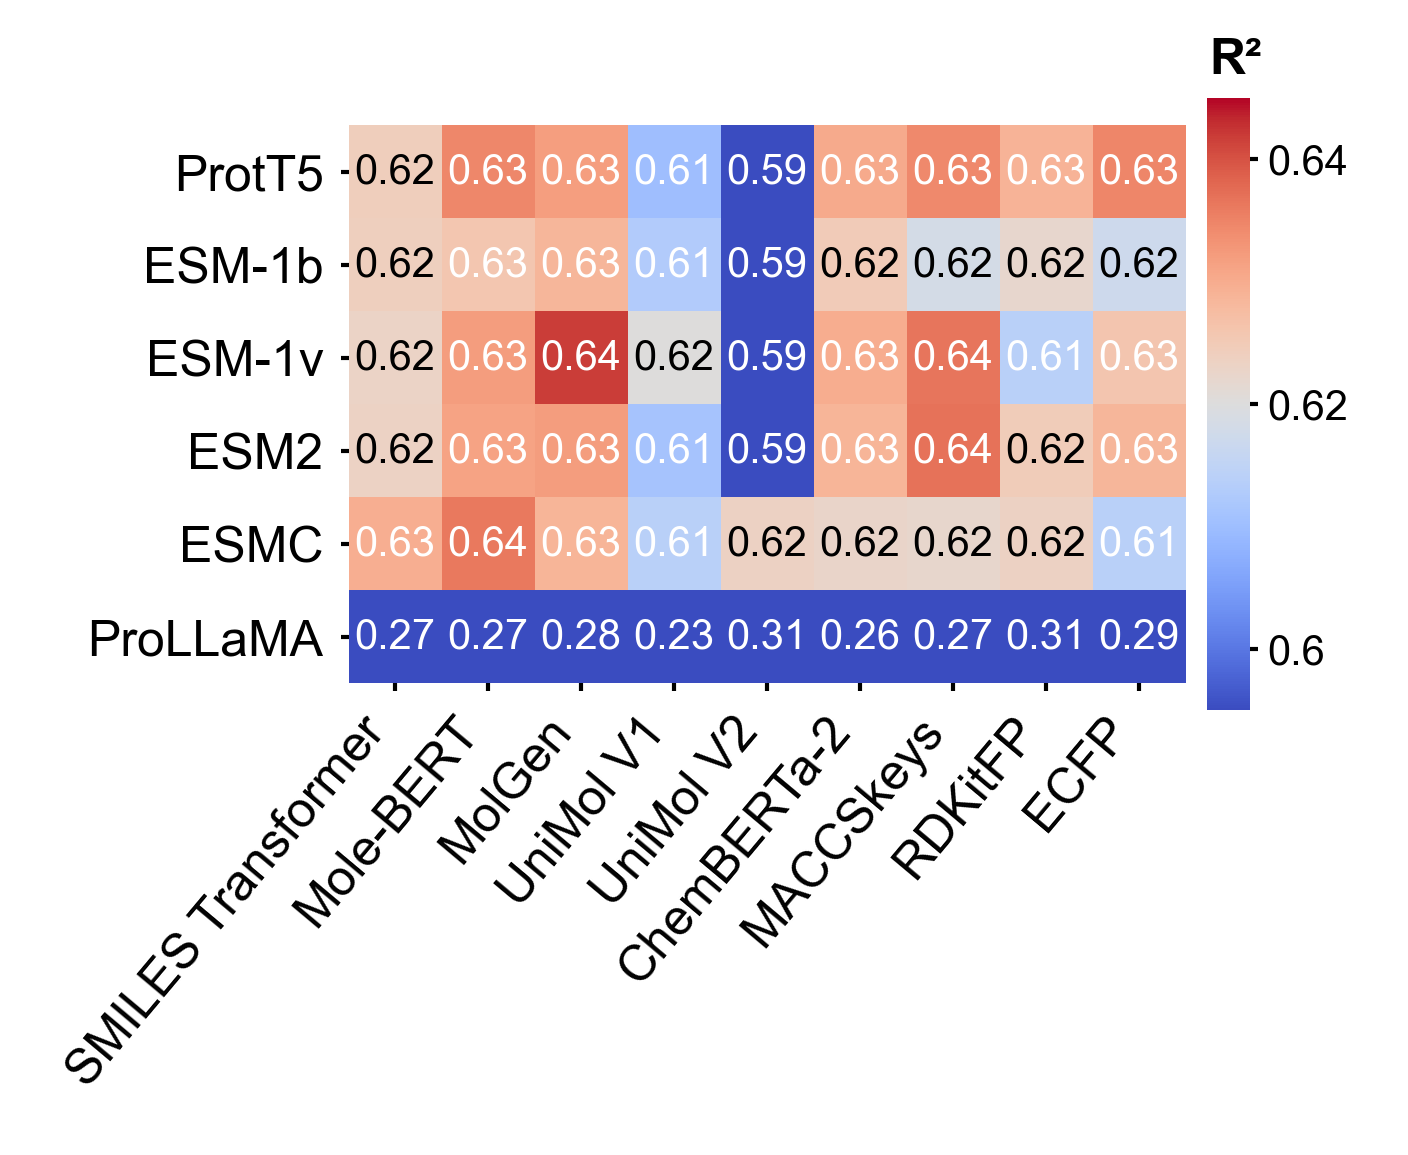

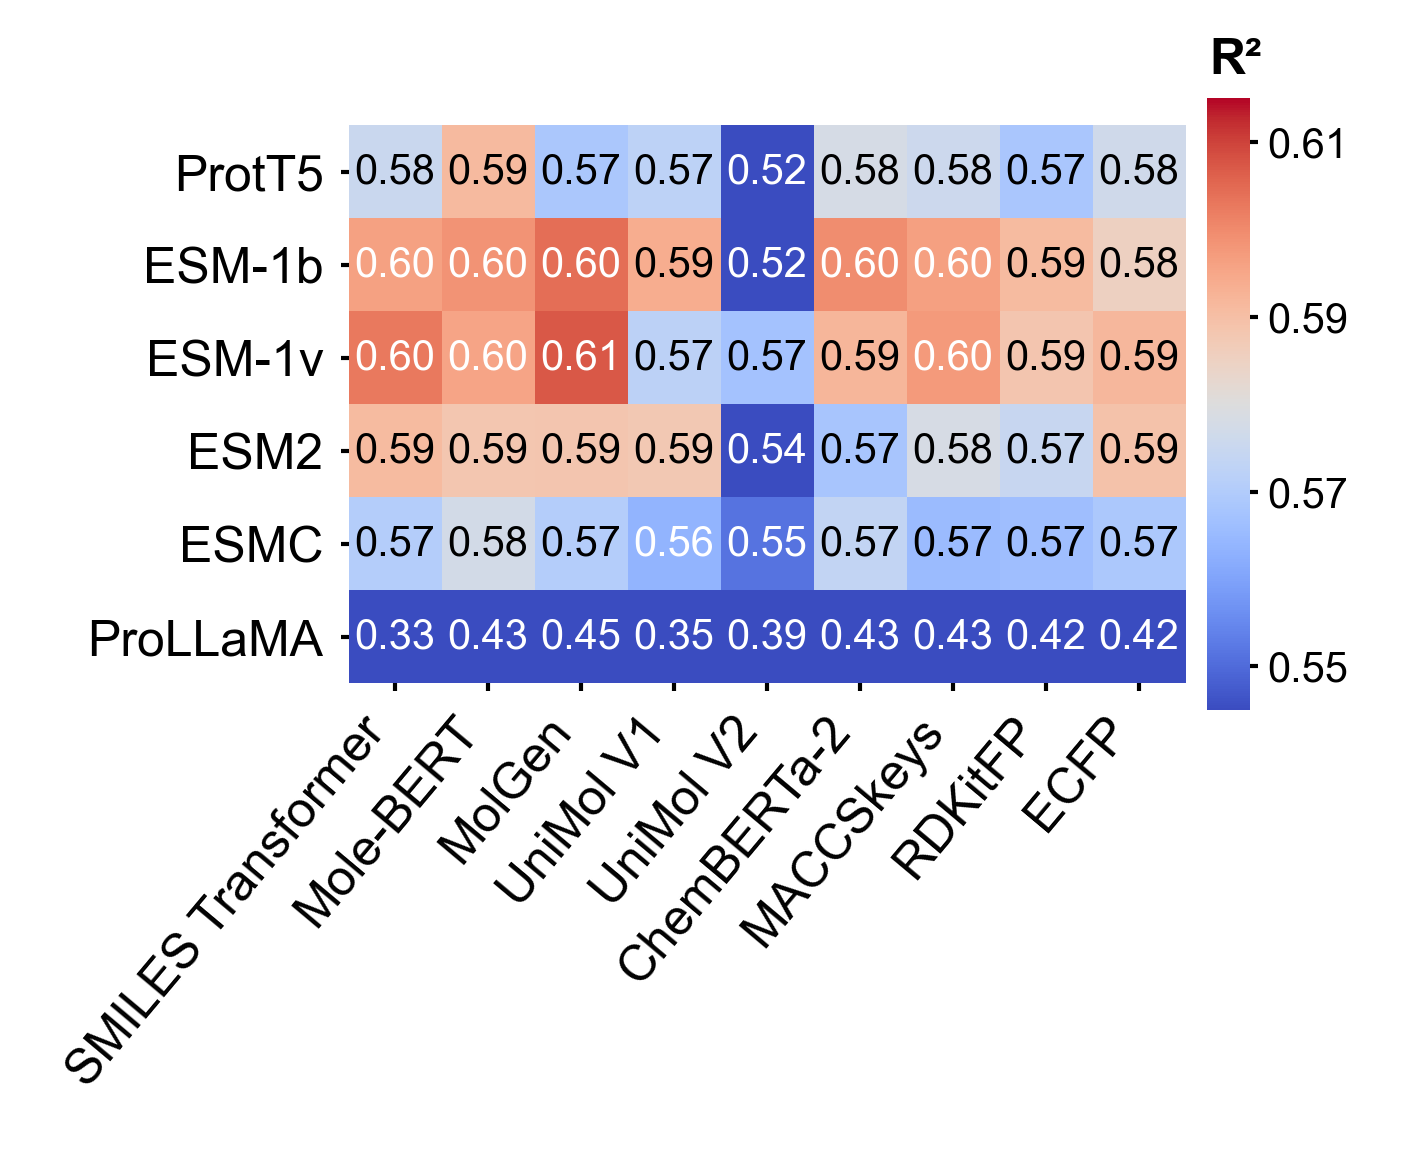

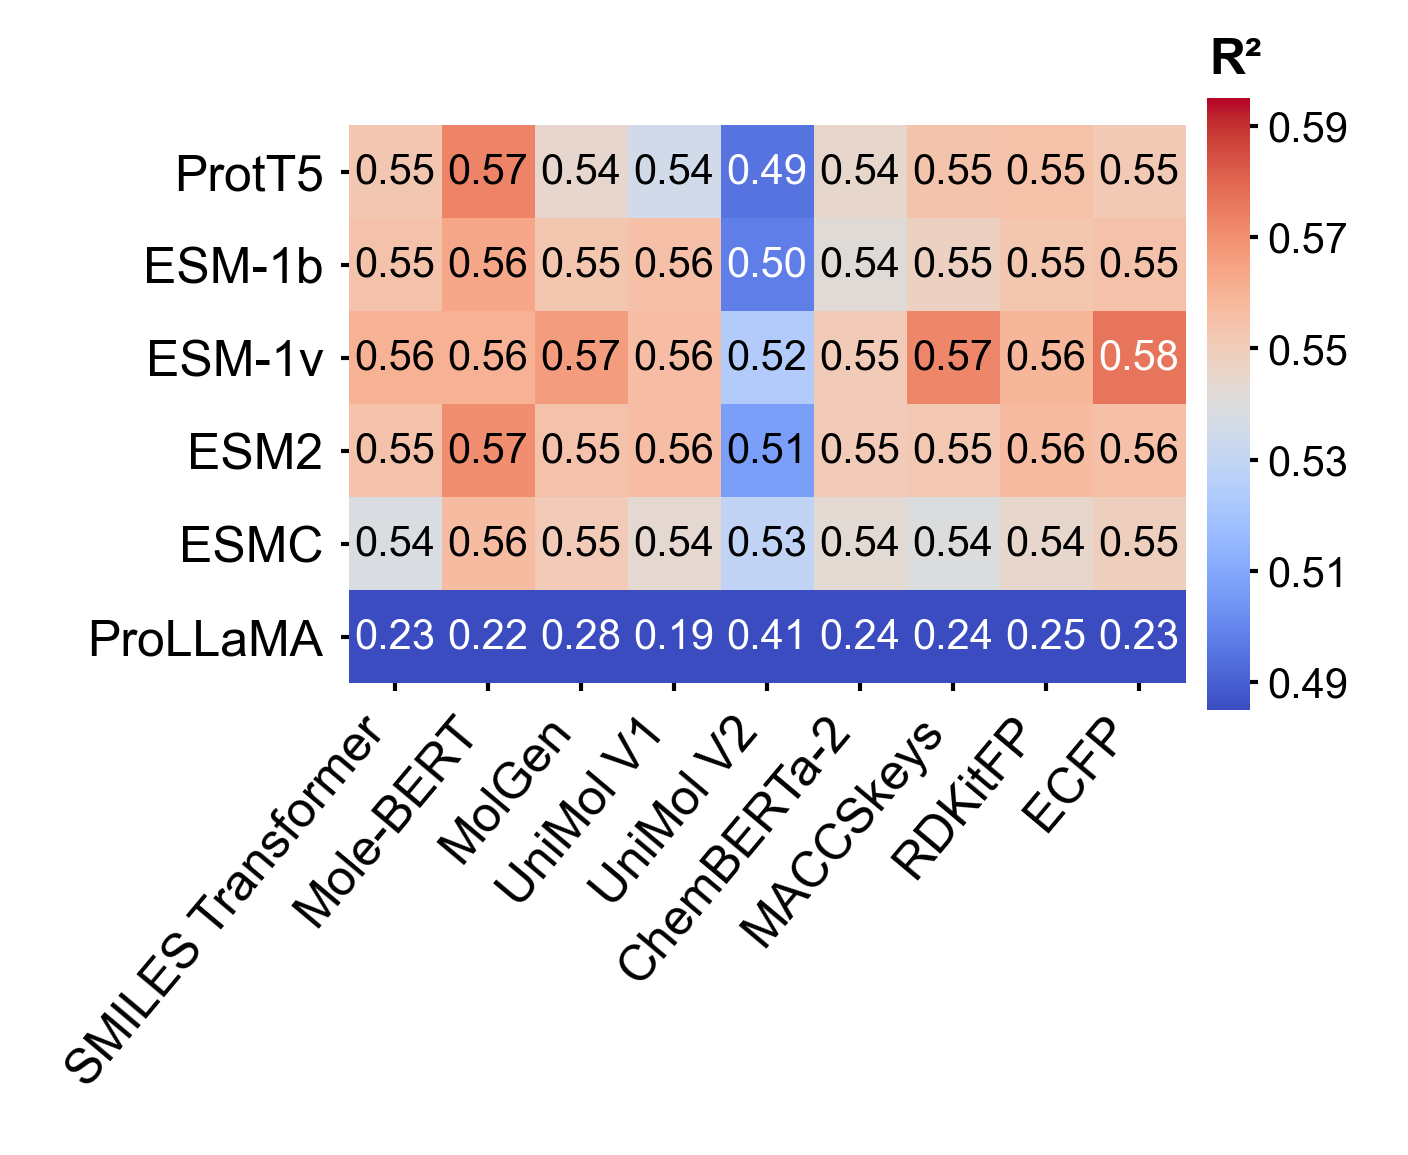

In [6]:
matrix, protein_features, substrate_features = new_plot('../Data/cv/KCAT_eitlem.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.645, vmin=0.595, figname='./pdf/fig3-eitlem_kcat.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KM_eitlem.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.615, vmin=0.545, figname='./pdf/fig3-eitlem_km.pdf')
matrix, protein_features, substrate_features = new_plot('../Data/cv/KKM_eitlem.json')
plot_heatmap(matrix, protein_features_mapped, substrate_features_mapped, vmax=0.595, vmin=0.485, figname='./pdf/fig3-eitlem_kkm.pdf')